# _Loan Prediction - Classification_

_**Classification =** Cevabı evet hayır veya positive, negative, nötr gibi olan modellerde kullanılır._

_Bu projede, müşterilerin kredi geri ödeme olasılıklarını tahmin edip iyi müşterileri belirleyeceğiz._

### _İmport_

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

# pandas kütüphanesi veri analizi ve tablo (DataFrame) işlemleri için kullanılır.
# Bu ayar, çıktıdaki maksimum sütun sayısını 100 olarak belirler, böylece veriler tam görünür.

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# warnings kütüphanesi, çalışma sırasında çıkan uyarı mesajlarını kontrol eder.
# Bu satır uyarı mesajlarını gizleyerek çıktının temiz görünmesini sağlar.

import matplotlib.pyplot as plt
import seaborn as sns 

# matplotlib.pyplot ve seaborn kütüphaneleri veri görselleştirme için kullanılır.
# plt temel grafik çizimlerinde, sns ise daha gelişmiş ve estetik grafiklerde tercih edilir.

### _Data Okuma_

In [2]:
df = pd.read_csv('LoansTrainingSet.csv')

# 'LoansTrainingSet.csv' adlı CSV dosyasını okur ve veriyi bir pandas DataFrame'i olarak 'df' değişkenine yükler.

### _Eda (Exploratory Data Analysis)_

In [3]:
df.head()
# Veri setinin ilk 5 satırını görüntüler.
# Bu, veri yapısını ve sütunları genel olarak incelemek için kullanılır.

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.sample()
# Veri setinden rastgele bir satır (veya satırlar) getirir.
# Veri kontrolü ve genel görünüm hakkında fikir edinmek için yararlıdır.

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
135341,8699a6b8-24b5-4ab3-95bd-02f3f0dc1f72,29943b92-1398-4bdc-8849-d68f8a71a927,Fully Paid,34164,Long Term,NaN,1 year,Rent,NaN,Debt Consolidation,"$1,273.81",16.0,69.0,30,0,6821,33601,0.0,0.0


In [5]:
df.shape
# Veri setinin boyutlarını (satır, sütun) bir demet (tuple) olarak döndürür.
# Örneğin (1470, 35) gibi bir çıktı verir.

(256984, 19)

In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [7]:
df.describe(include = object)

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
count,256984,256984,256984,256984,245508,256984,256984,256984,256984
unique,215700,215700,2,2,11,4,10,129115,87188
top,1258f52e-29c7-4ce3-aef9-f3503c29d666,1f5d4176-eb02-4cf1-b305-130d408bc3ce,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,$0.00,0
freq,4,4,176191,192632,78896,124477,203911,254,1597


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

### _Eksik Değer Analizi (Missing Value Analysis)_

In [9]:
# Eksik değer sayısı
missing = df.isnull().sum().sort_values(ascending=False)  # Her sütundaki eksik değerleri sayar ve çoktan aza doğru sıralar
missing[missing > 0]  # Eksik değeri olan sütunları ve eksik sayılarını gösterir

Months since last delinquent    140383
Credit Score                     61676
Annual Income                    61676
Years in current job             11476
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [10]:
# Medyan ve modları hesaplayalım
median_credit = df['Credit Score'].median()
median_income = df['Annual Income'].median()
median_delinquent = df['Months since last delinquent'].median()
median_bankruptcies = df['Bankruptcies'].median()
median_tax_liens = df['Tax Liens'].median()
mode_years_job = df['Years in current job'].mode()[0]

In [11]:
# Doldurma
df['Months since last delinquent'].fillna(median_delinquent, inplace=True)
df['Credit Score'].fillna(median_credit, inplace=True)
df['Annual Income'].fillna(median_income, inplace=True)
df['Years in current job'].fillna(mode_years_job, inplace=True)
df['Bankruptcies'].fillna(median_bankruptcies, inplace=True)
df['Tax Liens'].fillna(median_tax_liens, inplace=True)

In [12]:
df.isnull().sum().sort_values(ascending=False)

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  256984 non-null  float64
 6   Years in current job          256984 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 256984 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  256984 non-nul

In [14]:
df.sample()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
113726,70fe9e8d-48fd-46a1-a17d-50c859c72793,480d9295-eafd-47a4-90b3-96a4addee86a,Charged Off,14004,Short Term,721.0,10+ years,Rent,45014.0,Debt Consolidation,$667.70,22.4,81.0,11,0,11613,15103,0.0,0.0


### _Transform categorical data into numeric_

In [15]:
# Loan Status'ü 0-1 yap
df['Loan Status'] = df['Loan Status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [16]:
# 'Years in current job' gibi kategorik kolonları sayısala çevir
df['Years in current job'] = df['Years in current job'].str.extract('(\d+)').astype(int)

In [17]:
# '$' ve ',' karakterlerini kaldır
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('[\$,]', '', regex=True)

# Sayısala çevirmeye çalış, hatalı değerleri NaN yap
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'], errors='coerce')

# NaN olanları medyan ile doldur
median_max_credit = df['Maximum Open Credit'].median()
df['Maximum Open Credit'].fillna(median_max_credit, inplace=True)

In [18]:
df['Monthly Debt'] = df['Monthly Debt'].replace('[\$,]', '', regex=True)
df['Monthly Debt'] = pd.to_numeric(df['Monthly Debt'], errors='coerce')
median_monthly_debt = df['Monthly Debt'].median()
df['Monthly Debt'].fillna(median_monthly_debt, inplace=True)

### _Feature Engineering (Yeni değişkenler oluşturma)_

In [19]:
df['Debt_to_Income'] = df['Monthly Debt'] / (df['Annual Income']/12)

In [20]:
df['Credit_Utilization'] = df['Current Credit Balance'] / df['Maximum Open Credit']

In [21]:
# Debt_to_Income ve Credit_Utilization kolonlarını median ile doldur
df['Debt_to_Income'].fillna(df['Debt_to_Income'].median(), inplace=True)
df['Credit_Utilization'].fillna(df['Credit_Utilization'].median(), inplace=True)

In [22]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Debt_to_Income                  0
Credit_Utilization              0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  int64  
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  256984 non-null  float64
 6   Years in current job          256984 non-null  int64  
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 256984 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  float64
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  256984 non-nul

In [24]:
df.sample()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Debt_to_Income,Credit_Utilization
164351,a3869c89-01f9-4996-abfc-476a2a26a6cf,fbbe1e0c-6e4e-47e4-b777-6bfc9d5854dc,1,20486,Long Term,733.0,8,Rent,61242.0,other,998.69,25.0,24.0,9,1,3746,21906.0,1.0,0.0,0.195687,0.171003


### _Modelling_

#### _Gerekli kütüphaneleri import edelim;_

In [25]:
from sklearn.model_selection import train_test_split  # Veriyi eğitim ve test olarak ayırmak için gerekli fonksiyon

from sklearn.naive_bayes import GaussianNB  # Sürekli sayısal veriler için Naive Bayes sınıflandırıcısı

from sklearn.naive_bayes import BernoulliNB  # Binary (0/1) veriler için Naive Bayes sınıflandırıcısı

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
# Model performansını ölçmek için; doğruluk, karışıklık matrisi ve detaylı sınıflandırma raporu

from yellowbrick.classifier import roc_auc  # ROC-AUC görselleştirmesi yapmak için Yellowbrick aracı

from yellowbrick.datasets import load_spam  # Örnek spam veri setini yüklemek için

from sklearn.tree import DecisionTreeClassifier  # Karar ağacı sınıflandırıcısı

from sklearn.ensemble import RandomForestClassifier  # Rastgele orman (birden fazla karar ağacı) sınıflandırıcısı

from sklearn.neighbors import KNeighborsClassifier  # K-en yakın komşu algoritması sınıflandırıcısı

from sklearn.ensemble import GradientBoostingClassifier  # Gradyan artırımlı karar ağacı sınıflandırıcısı

from sklearn.linear_model import LogisticRegression  # Lojistik regresyon sınıflandırıcısı (0/1 tahmini)

from sklearn.preprocessing import StandardScaler

#### _Datayı ikiye bölelim;_

In [26]:
# ID kolonlarını çıkar
x = df.drop(columns=['Loan ID', 'Customer ID', 'Loan Status'])

In [27]:
# Kategorik kolonlar
categorical_cols = ['Term', 'Home Ownership', 'Purpose']

In [28]:
# One-hot encoding
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

In [29]:
# Infinite ve çok büyük sayıları NaN yap
x.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eksik değerleri median ile doldur
x.fillna(x.median(), inplace=True)

In [30]:
# Hedef değişken
y = df['Loan Status']

In [31]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  int64  
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  256984 non-null  float64
 6   Years in current job          256984 non-null  int64  
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 256984 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  float64
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  256984 non-nul

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)  

# Veriyi eğitim ve test olarak ayırıyoruz
# x -> özellikler (features), y -> hedef değişken (target)
# test_size=0.15 -> verinin %15'i test için ayrılır, %85'i eğitim için
# random_state=42 -> veriyi her çalıştırmada aynı şekilde bölmek için sabit sayı

#### _Classification Yapalım;_

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [35]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[ 2274 13887]
 [ 1959 33277]]
LogisticRegression()  modeli eğitiliyor!..
[[ 3392 12769]
 [  177 35059]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[11032  5129]
 [ 7268 27968]]
RandomForestClassifier()  modeli eğitiliyor!..
[[ 9943  6218]
 [ 1685 33551]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[ 5735 10426]
 [ 1673 33563]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[ 7205  8956]
 [ 5464 29772]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[ 4725 11436]
 [ 1139 34097]]
MultinomialNB()  modeli eğitiliyor!..
[[16161     0]
 [28363  6873]]
Eğitim tamamlandı.
En başarılı model:  RandomForestClassifier
Confusion Matrix:
[[ 9943  6218]
 [ 1685 33551]]
classification Report:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72     16161
           1       0.84      0.95      0.89     35236

    accuracy                           0.85     51397
   macro avg     

,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.846236,0.846236,0.846236,0.846236
GradientBoostingClassifier,0.764597,0.764597,0.764597,0.764597
DecisionTreeClassifier,0.758799,0.758799,0.758799,0.758799
AdaBoostClassifier,0.755336,0.755336,0.755336,0.755336
LogisticRegression,0.748118,0.748118,0.748118,0.748118
KNeighborsClassifier,0.719439,0.719439,0.719439,0.719439
BernoulliNB,0.691694,0.691694,0.691694,0.691694
MultinomialNB,0.448158,0.448158,0.448158,0.448158


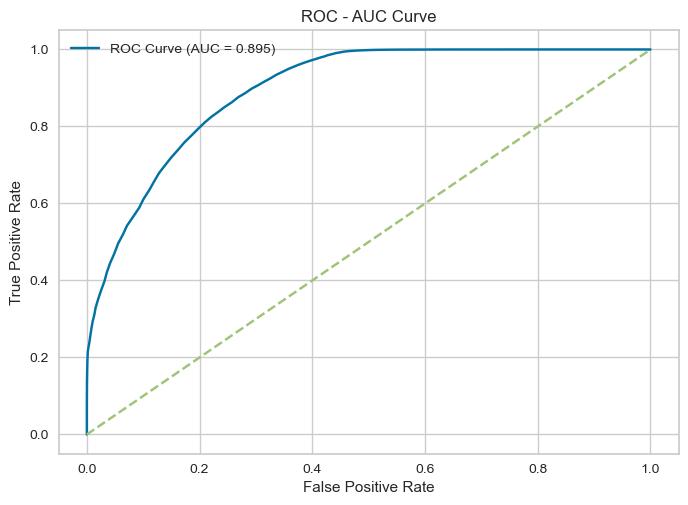

ROC-AUC Score: 0.8954300305959981


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# En iyi modeli RandomForest olarak seçelim:
best_model = RandomForestClassifier()
best_model.fit(x_train, y_train)

# Tahmin olasılıkları (pozitif class için)
y_probs = best_model.predict_proba(x_test)[:, 1]

# ROC değerleri
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Grafik
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')  # Random guess çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC Curve')
plt.legend()
plt.show()

print("ROC-AUC Score:", roc_auc)


### _Feature Importance_

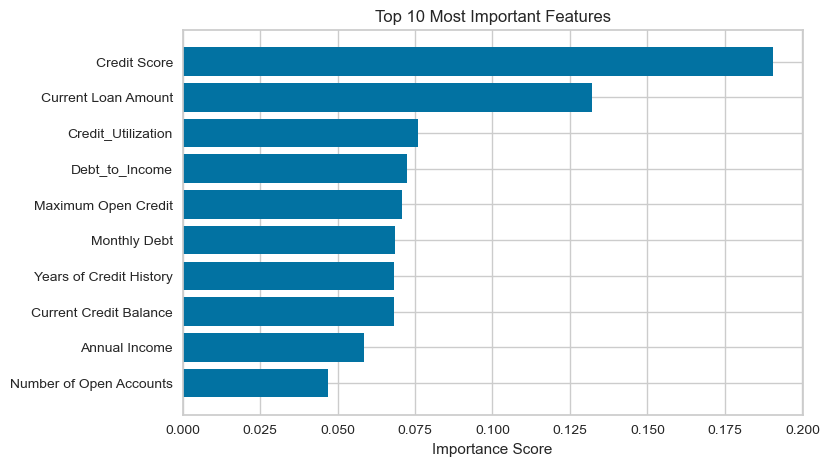

,Feature,Importance
1,Credit Score,0.190557
0,Current Loan Amount,0.132023
14,Credit_Utilization,0.075911
13,Debt_to_Income,0.072462
10,Maximum Open Credit,0.070943
4,Monthly Debt,0.068472
5,Years of Credit History,0.068366
9,Current Credit Balance,0.068357
3,Annual Income,0.058598
7,Number of Open Accounts,0.046824


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature Importance alma
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# İlk 10 özelliği görselleştirelim
plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'].head(10),
         feature_importance['Importance'].head(10))
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 10 Most Important Features")
plt.show()

feature_importance.head(15)


### _Müşteri Başvuru Sırasında Sorulacak Kritik Sorular_

Aşağıdaki sorular modelimizin en önemli bulduğu değişkenlere göre belirlenmiştir:

| Özellik (Feature) | Müşteriye Sorulacak Soru |
|------------------|------------------------|
| Credit Score | Kredi puanınız nedir? Resmî bir rapor sunabilir misiniz? |
| Current Loan Amount | Hâlihazırda devam eden kredi borcunuz ne kadar? |
| Credit Utilization | Kredi kartı limitinizin ne kadarını kullanıyorsunuz? (%) |
| Debt_to_Income | Aylık geliriniz ve toplam borç ödemeniz ne kadar? |
| Maximum Open Credit | Daha önce sahip olduğunuz en yüksek kredi limiti nedir? |
| Years of Credit History | Kaç yıldır kredi geçmişiniz var? |
| Current Credit Balance | Şu anki toplam kredi bakiyeniz nedir? |
| Monthly Debt | Her ay ödediğiniz toplam borç tutarı ne kadardır? |
| Annual Income | Yıllık geliriniz ne kadar? |
| Number of Open Accounts | Kaç kredi/hesabınız aktif durumda? |
| Months since last delinquent | Son gecikmiş ödemeniz üzerinden kaç ay geçti? |
| Years in current job | Kaç yıldır mevcut işinizdesiniz? |
| Loan Term | Kısa vadeli mi, uzun vadeli mi kredi talep ediyorsunuz? |
| Number of Credit Problems | Daha önce kaç kredi problemi yaşadınız? |
| Purpose | Krediyi hangi amaçla kullanacaksınız? |

_Birden fazla sınıflandırma modeli test edilmiştir. Modeller arasında en başarılı olan **RandomForestClassifier** olmuştur._ <br>
_Eğitim ve test kümesi üzerinde yaklaşık **%85 doğruluk** sağlamıştır._